In [1]:
import datetime
import time

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import notebook_libs.utilities as util
import notebook_libs.prometheus as prom

# Experiment in Progress - Client Data

Updated 2023-03-02 14:49:50.778365
in-progress
count            4
unique           3
top        line 74
freq             2
Name: client_latency_ms, dtype: object



ValueError: hist method requires numerical or datetime columns, nothing to plot.

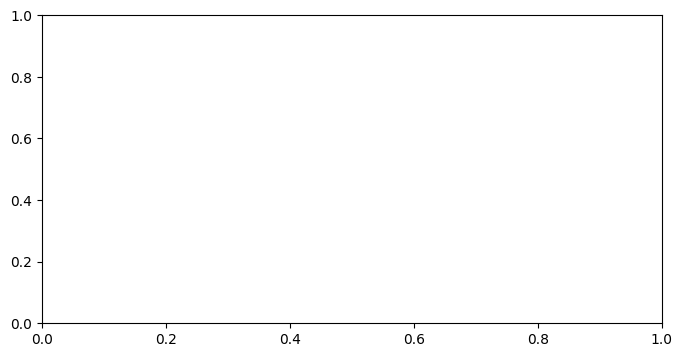

In [2]:
print(f"Updated {datetime.datetime.now()}")
df = util.read_client_requests_in_progress()
f, ax = plt.subplots(figsize=[8,4])
util.plot_client_latency_distribution(df, "in-progress", ax)
plt.show()
result = prom.fetch_experiment_pod_data(int(14000/60.))
util.plot_pod_metrics(result)
plt.show()

# Completed Experiments

In [4]:
print("\n".join([f"{i}: {x}" for i, x in enumerate(util.all_experiments)]))

0: 2023-02-26_4-replicas
1: 2023-02-26_5-replicas
2: 2023-02-27_6-replicas
3: 2023-02-24_2-replicas
4: 2023-02-24_3-replicas
5: 2023-02-19_4-replicas
6: 2023-03-01_3-replicas
7: 2023-03-01_2-replicas
8: 2023-02-24_5-replicas
9: 2023-02-24_4-replicas
10: 2023-02-28_6-replicas
11: 2023-02-19_2-replicas
12: 2023-02-25_6-replicas
13: 2023-03-01_4-replicas
14: 2023-03-01_5-replicas
15: 2023-02-26_3-replicas
16: 2023-02-26_2-replicas
17: 2023-02-25_3-replicas
18: 2023-02-25_2-replicas
19: 2023-02-28_3-replicas
20: 2023-02-28_2-replicas
21: 2023-02-27_5-replicas
22: 2023-02-27_4-replicas
23: 2023-02-17_3-replicas
24: 2023-02-26_6-replicas
25: 2023-02-27_2-replicas
26: 2023-02-27_3-replicas
27: 2023-02-17_5-replicas
28: 2023-02-17_4-replicas
29: 2023-02-20_5-replicas
30: 2023-03-02_2-replicas
31: 2023-02-25_4-replicas
32: 2023-02-25_5-replicas
33: 2023-02-18_3-replicas
34: 2023-03-01_6-replicas
35: 2023-02-24_6-replicas
36: 2023-02-28_4-replicas
37: 2023-02-28_5-replicas


In [5]:
print("\n".join([f"{i}: {x}" for i, x in enumerate(util.experiments_10_250)]))

0: 2023-02-17_3-replicas
1: 2023-02-17_4-replicas
2: 2023-02-17_5-replicas
3: 2023-02-19_2-replicas
4: 2023-02-18_3-replicas
5: 2023-02-19_4-replicas
6: 2023-02-20_5-replicas
7: 2023-02-24_2-replicas
8: 2023-02-24_3-replicas
9: 2023-02-24_4-replicas
10: 2023-02-24_5-replicas
11: 2023-02-24_6-replicas
12: 2023-02-27_2-replicas
13: 2023-02-27_3-replicas
14: 2023-02-27_4-replicas
15: 2023-02-27_5-replicas
16: 2023-02-27_6-replicas
17: 2023-02-28_2-replicas
18: 2023-02-28_3-replicas
19: 2023-02-28_4-replicas


In [6]:
current_experiment = util.all_experiments[32]

## 1-Minute buckets for client request data

<Axes: title={'center': 'Client Metrics (1Min Buckets)'}, xlabel='bucket_1_min'>

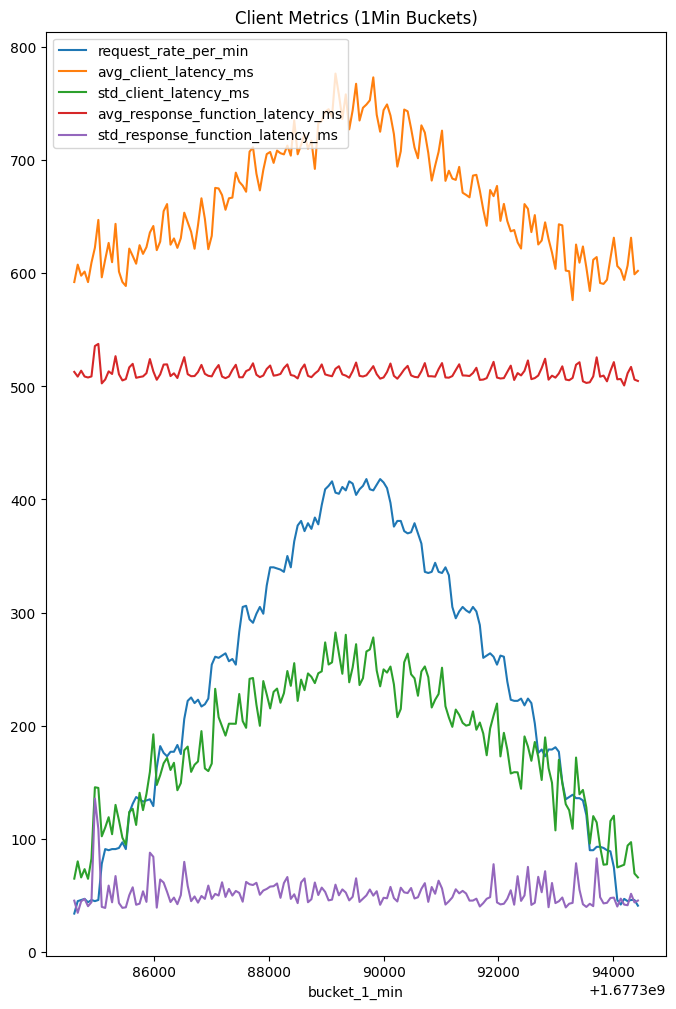

In [7]:
df, first_request_time, final_request_time = util.read_client_requests(current_experiment)
df_bucket = util.create_1_min_bucket_client_metrics(df)
df_bucket.plot(y=[
    "request_rate_per_min", 
    "avg_client_latency_ms",
    "std_client_latency_ms",
    "avg_response_function_latency_ms",
    "std_response_function_latency_ms"
]
,figsize=[8,12]
,title="Client Metrics (1Min Buckets)")

## Compare a Group of Experiments

2023-02-17_3-replicas
count    59995.000000
mean      1173.349972
std        481.660493
min        507.251978
25%        767.608285
50%       1112.864017
75%       1501.094460
max       3441.249847
Name: client_latency_ms, dtype: float64

2023-02-17_4-replicas
count    59998.000000
mean       842.603558
std        294.477399
min        497.415066
25%        575.165749
50%        783.455968
75%       1030.104816
max       2526.618719
Name: client_latency_ms, dtype: float64

2023-02-17_5-replicas
count    59998.000000
mean       745.289115
std        247.546582
min        495.505810
25%        542.471647
50%        652.411938
75%        897.298217
max       2374.262094
Name: client_latency_ms, dtype: float64

2023-02-19_2-replicas
count    35998.000000
mean      1561.856458
std       1030.552934
min        507.892132
25%        798.567772
50%       1159.041047
75%       2065.674961
max       5012.794256
Name: client_latency_ms, dtype: float64

2023-02-18_3-replicas
count    59992.000000


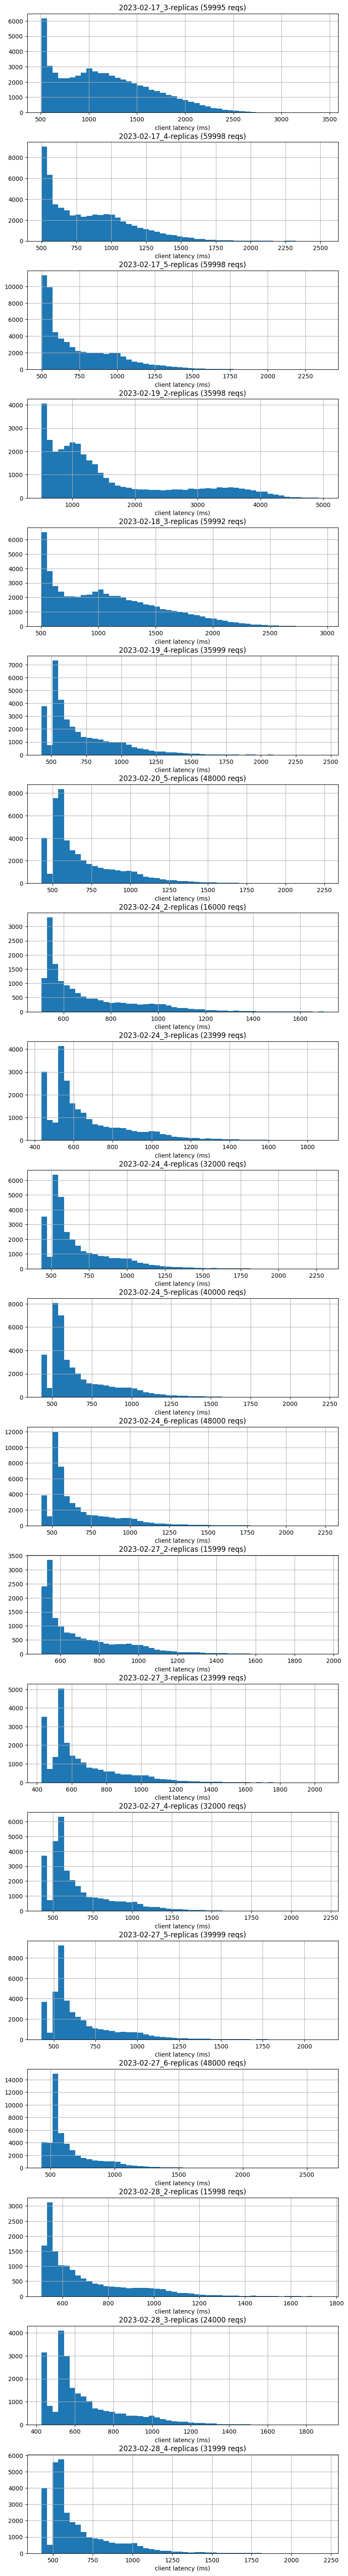

In [9]:
util.compare_client_latency_distributions(util.experiments_10_250)

## Experiment Complete - Compare data window between Client and Prometheus

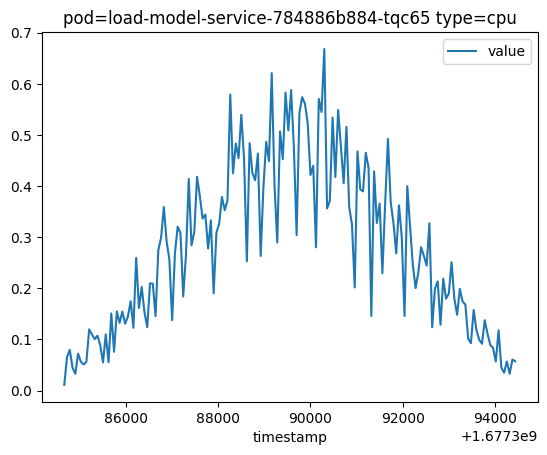

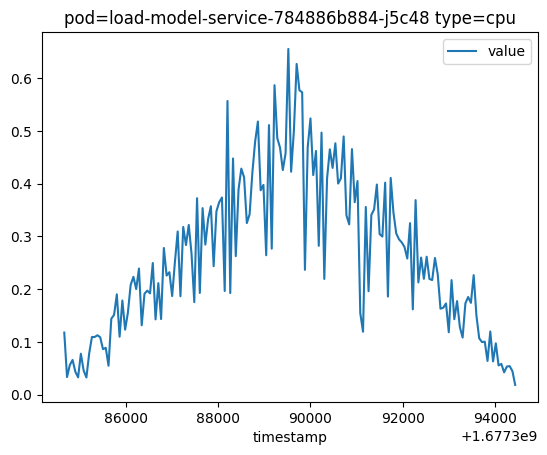

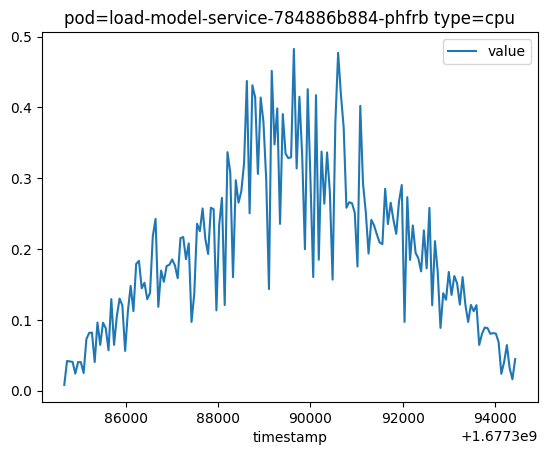

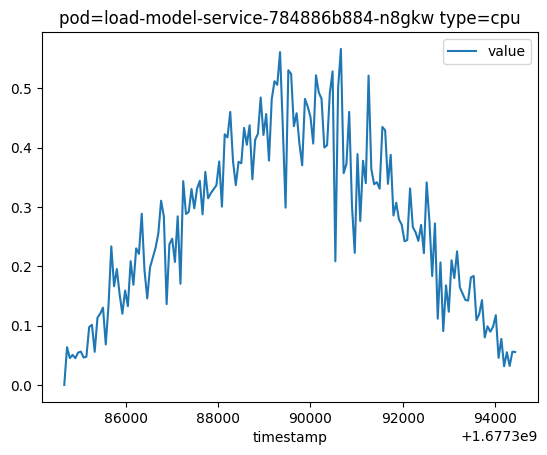

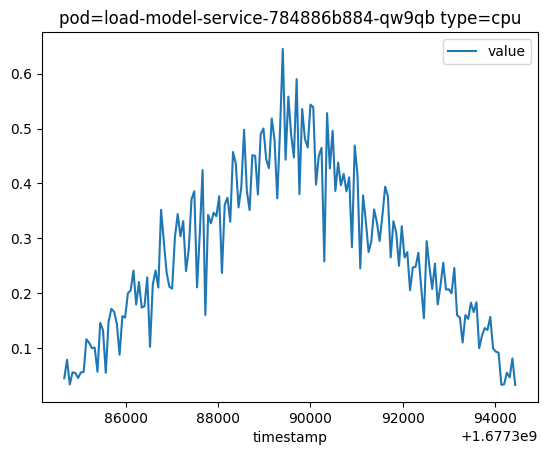

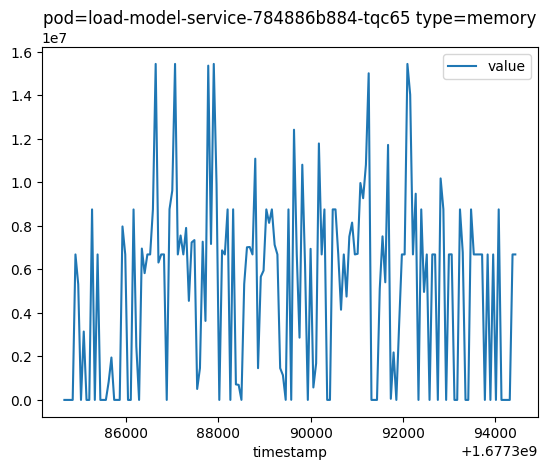

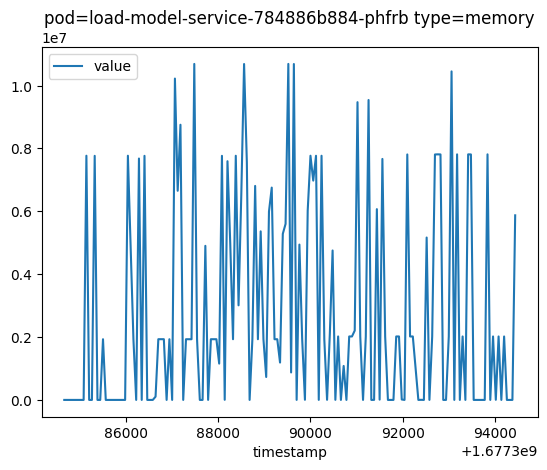

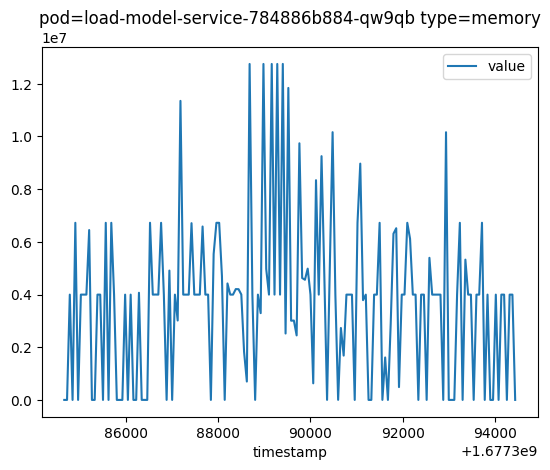

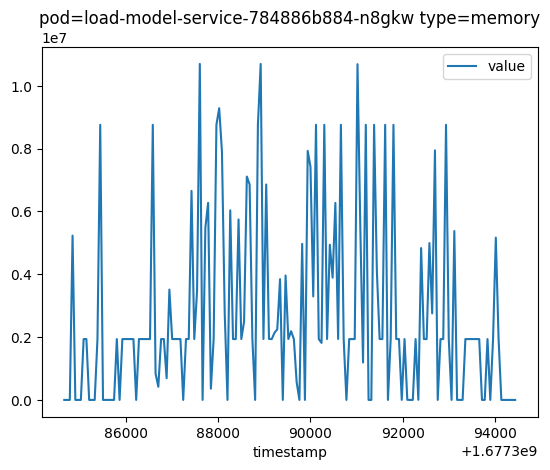

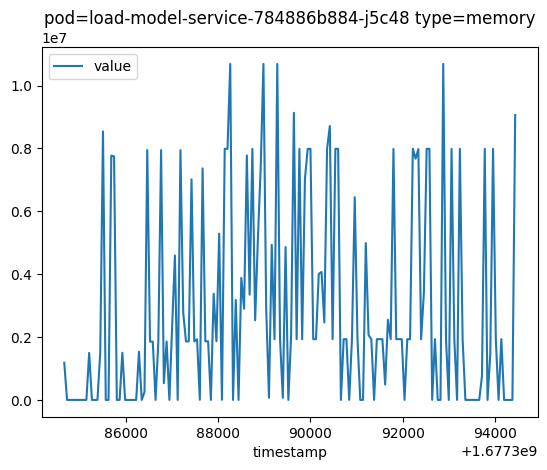

In [8]:
df_pod = util.read_pod_df_list(current_experiment, first_request_time, final_request_time)
util.plot_pod_metrics(df_pod)

In [9]:
df = util.combined_data_set(current_experiment)
df.head(10)

,memory,cpu,request_rate_per_min,avg_client_latency_ms,std_client_latency_ms,avg_response_function_latency_ms,std_response_function_latency_ms,avg_response_memory_usage_mb,std_response_memory_usage_mb,avg_response_load_time_ms,std_response_load_time_ms,replicas
timestamp,,,,,,,,,,,,
1677384660,2.363564e+05,0.036312,45.0,607.519484,80.166688,508.565150,34.664943,291.225087,1.577647,41.826741,6.277671,5
1677384720,5.461333e+01,0.056583,46.0,597.735830,65.947606,513.778142,44.840953,291.303838,1.665172,42.105416,6.347324,5
1677384780,7.994846e+05,0.051144,47.0,601.374611,73.278232,508.639046,46.990311,291.245595,1.597497,41.808494,5.669405,5
1677384840,1.045791e+06,0.051414,44.0,592.062083,64.725540,507.782345,40.510133,291.283558,1.621842,41.752078,5.986799,5
1677384900,2.682028e+06,0.040004,46.0,609.249566,82.609770,508.708581,44.065012,291.268597,1.617615,41.809429,6.608634,5
1677384960,1.062994e+06,0.049058,45.0,622.436153,145.645359,535.582468,135.670053,291.275000,1.616968,44.104640,13.202197,5
1677385020,7.997303e+05,0.057187,46.0,647.038874,145.051238,537.450593,108.768602,291.380605,1.614674,42.517595,6.890940,5
1677385080,1.815484e+06,0.044871,78.0,596.319932,102.307891,502.572530,39.915008,291.179187,1.583509,41.747417,5.695573,5
1677385140,2.740867e+06,0.065025,91.0,612.067964,110.047442,505.996869,38.991926,291.306920,1.619944,41.503804,5.597516,5


<Axes: xlabel='request_rate_per_min', ylabel='memory'>

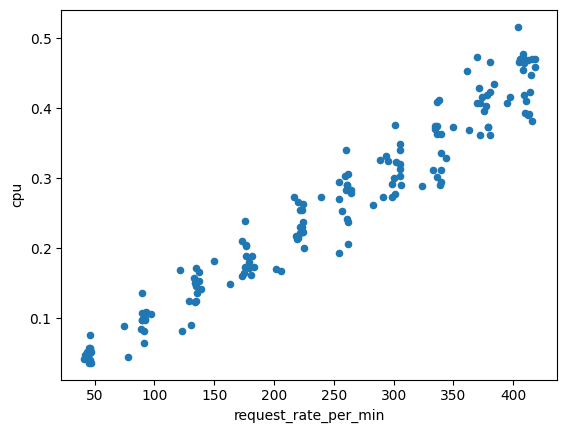

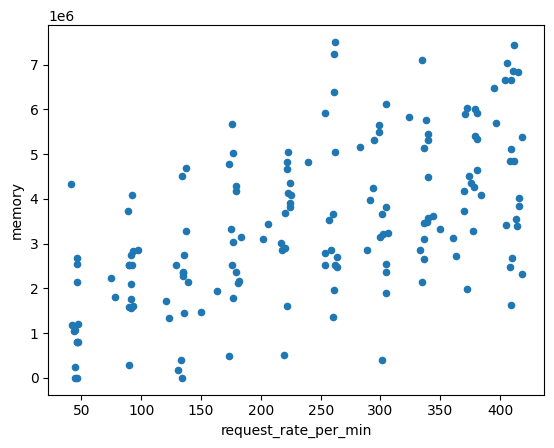

In [10]:
df.plot.scatter(x="request_rate_per_min",y="cpu")
df.plot.scatter(x="request_rate_per_min",y="memory")

# Workload Response Model

In [23]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [24]:
df = util.combined_data_sets(util.experiments_10_250)
print(df.head(4))

                  memory       cpu  request_rate_per_min  \
timestamp                                                  
1676685600  4.551111e+01  0.007186                  49.0   
1676685660  2.226540e+06  0.068497                  46.0   
1676685720  6.900213e+06  0.079064                  48.0   
1676685780  1.755182e+06  0.098106                  45.0   

            avg_client_latency_ms  std_client_latency_ms  \
timestamp                                                  
1676685600             574.022405              58.230970   
1676685660             609.304216              68.931421   
1676685720             608.947660              74.371525   
1676685780             594.807487              76.878553   

            avg_response_function_latency_ms  \
timestamp                                      
1676685600                        502.168101   
1676685660                        516.961036   
1676685720                        525.960113   
1676685780                        510.

<Axes: title={'center': 'avg_client_latency_ms'}, xlabel='replicas'>

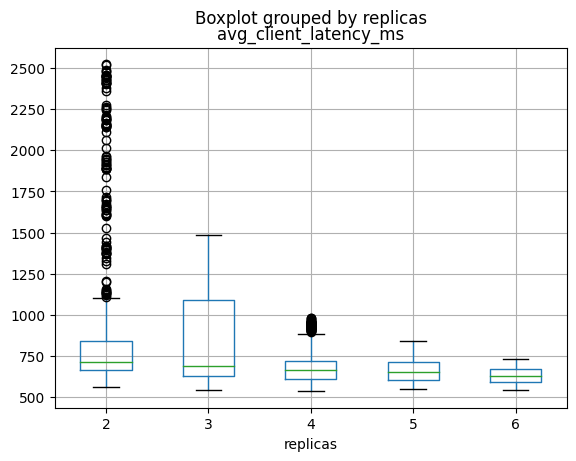

In [25]:
df.boxplot("avg_client_latency_ms", by="replicas")

<Axes: title={'center': 'avg_client_latency_ms'}, xlabel='log_req_rate'>

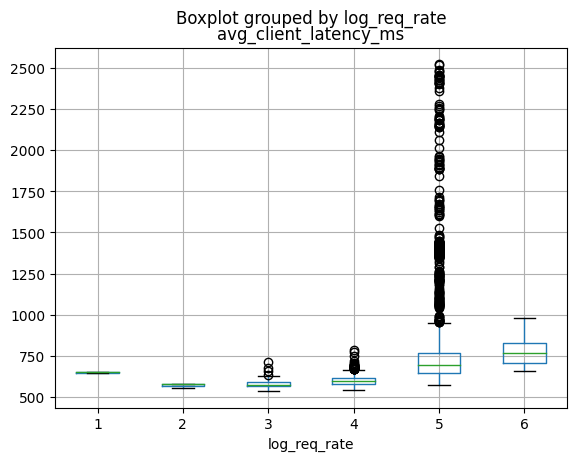

In [14]:
df["log_req_rate"] = df["request_rate_per_min"].apply(lambda x: int(np.log(x)))
df.boxplot("avg_client_latency_ms", by="log_req_rate")

<Axes: title={'center': 'avg_client_latency_ms'}, xlabel='log_memory'>

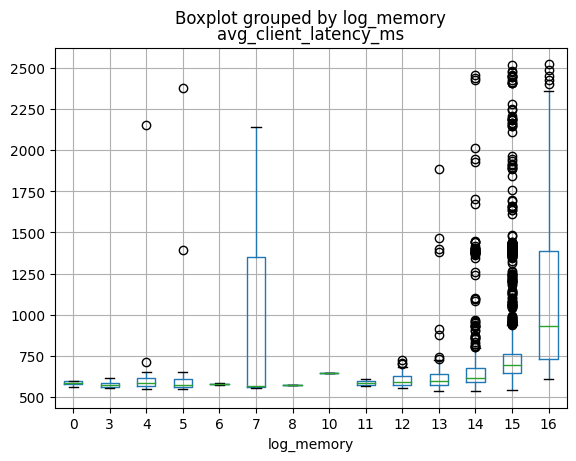

In [15]:
df["log_memory"] = df.memory.apply(lambda x: int(np.log(x+1)))
df.boxplot("avg_client_latency_ms", by="log_memory")

<Axes: title={'center': 'avg_client_latency_ms'}, xlabel='log_cpu'>

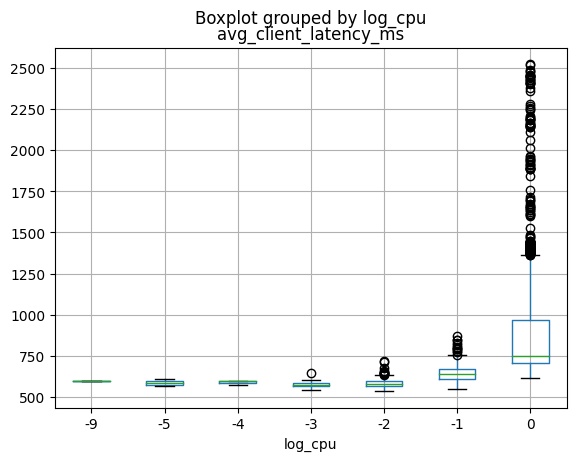

In [16]:
df["log_cpu"] = df.cpu.apply(lambda x: int(np.log(x)))
df.boxplot("avg_client_latency_ms", by="log_cpu")

In [29]:
# REMOVE memory 2023-02-28 
# df_train = df[[ "memory", "cpu", "request_rate_per_min", "avg_client_latency_ms", "replicas"]].copy()
df_train = df[[ "cpu", "request_rate_per_min", "avg_client_latency_ms", "replicas"]].copy()
df_train["avg_client_latency_ms"] = df_train["avg_client_latency_ms"].apply(lambda x: np.log(x))

In [30]:
scaler.fit(df_train)
scaled = scaler.transform(df_train)
# REMOVE memory 2023-02-28 
# X = scaled[:,[2,4]]
X = scaled[:,[1,3]]
# REMOVE memory 2023-02-28 
# y = scaled[:,[0,1,3]]
y = scaled[:,[0,2]]

In [31]:
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(12, activation='relu'))
# REMOVE memory 2023-02-28 
# model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=165, batch_size=30)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/165
104/104 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.6612
Epoch 2/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9490
Epoch 3/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9516
Epoch 4/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9516
Epoch 5/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9516
Epoch 6/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9516
Epoch 7/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9516
Epoch 8/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9516
Epoch 9/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9516
Epoch 10/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0039 - accura

104/104 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9558
Epoch 161/165
104/104 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9597
Epoch 162/165
104/104 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.9581
Epoch 163/165
104/104 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.9584
Epoch 164/165
104/104 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9597
Epoch 165/165
97/97 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9587
Accuracy: 95.87


In [32]:
def scan_for_replicas(model, scaler, req_rate, last_n, latency_target = 650, delta_n = 3, n_min = 2, n_max = 6):
    lat_data = []
    ns = np.array(range(max(n_min, last_n-delta_n), min(last_n+delta_n, n_max)))
    for n in ns:
        # REMOVE memory 2023-02-28 
        # X = scaler.transform(np.array([0, 0, req_rate, 0, n]).reshape(1, -1))[:,[2,4]]
        X = scaler.transform(np.array([0, req_rate, 0, n]).reshape(1, -1))[:,[1,3]]
        _y = model.predict(X)[0]
        # REMOVE memory 2023-02-28 
        # pred_lat = scaler.inverse_transform(np.array([_y[0], _y[1], req_rate, _y[2], n]).reshape(1, -1))
        pred_lat = scaler.inverse_transform(np.array([_y[0], req_rate, _y[1], n]).reshape(1, -1))
        # REMOVE memory 2023-02-28 
        # lat_data.append(pred_lat[0][3])
        lat_data.append(pred_lat[0][2])
    i, = np.where(np.array(lat_data) < np.log(latency_target))
    #print("target ", np.log(latency_target))
    #print("latency", lat_data)
    #print("     ns", ns)
    #print(i, ns[i])
    #print(min(ns[i]))
    try:
        res = min(ns[i])
    except (ValueError) as e:
        res = n_max
    return res

In [33]:
req_rate_v_n_data=[]
for rr in range(60, 350, 5):
    req_rate_v_n_data.append((rr, scan_for_replicas(model, scaler, rr, 4)))

1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  war

1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/Users/s.hendrickson/Library/Caches/pypoetry/virtualenvs/loadflaskdeploy-mJ1-TA_o-py3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


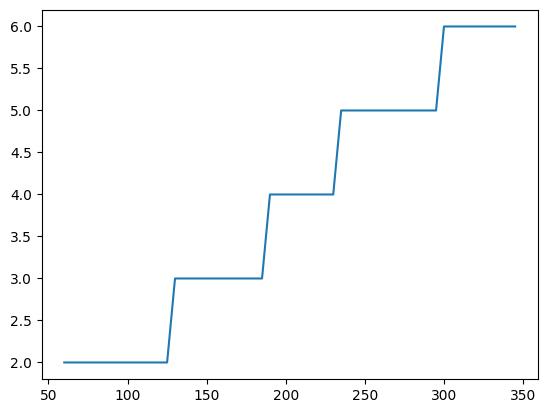

In [34]:
req_rate_v_n_data = np.array(req_rate_v_n_data)
plt.plot(req_rate_v_n_data.T[0], req_rate_v_n_data.T[1])    

# Real Time

### To Do
* correlations between client and server metrics
* what parameters to scan with more tests?
* how long is 10K transactions?